In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
#RSV data csv
file_path = "Resources/Respiratory_Syncytial_Virus_Laboratory_Data__NREVSS_.csv"

In [4]:
#putting CSV into a DF to break down
RSV_df = pd.read_csv(file_path)
RSV_df.head()

,Diagnostic Test Type,Surveillance Year,Week ending Code,Week ending Date,HHS region,RSV Detections,RSV Tests,Outlier
0,Antigen,1011,1027,10JUL2010,1,0,105,0
1,Antigen,1011,1028,17JUL2010,1,0,116,0
2,Antigen,1011,1029,24JUL2010,1,0,84,0
3,Antigen,1011,1030,31JUL2010,1,0,86,0
4,Antigen,1011,1031,07AUG2010,1,0,88,0


In [5]:
RSV_df["Week ending Date"]=pd.to_datetime(RSV_df["Week ending Date"], format="%d%b%Y")
RSV_df.head()

,Diagnostic Test Type,Surveillance Year,Week ending Code,Week ending Date,HHS region,RSV Detections,RSV Tests,Outlier
0,Antigen,1011,1027,2010-07-10,1,0,105,0
1,Antigen,1011,1028,2010-07-17,1,0,116,0
2,Antigen,1011,1029,2010-07-24,1,0,84,0
3,Antigen,1011,1030,2010-07-31,1,0,86,0
4,Antigen,1011,1031,2010-08-07,1,0,88,0


In [6]:
RSV_df = RSV_df.rename(columns = {"HHS region ":"HHS region"})
RSV_df.columns

Index(['Diagnostic Test Type ', 'Surveillance Year', 'Week ending Code ',
       'Week ending Date', 'HHS region', 'RSV Detections', 'RSV Tests',
       'Outlier'],
      dtype='object')

In [7]:
#break off year and month
RSV_df['Year'] = RSV_df['Week ending Date'].dt.year
RSV_df['Month'] = RSV_df['Week ending Date'].dt.month
RSV_df.head()

,Diagnostic Test Type,Surveillance Year,Week ending Code,Week ending Date,HHS region,RSV Detections,RSV Tests,Outlier,Year,Month
0,Antigen,1011,1027,2010-07-10,1,0,105,0,2010,7
1,Antigen,1011,1028,2010-07-17,1,0,116,0,2010,7
2,Antigen,1011,1029,2010-07-24,1,0,84,0,2010,7
3,Antigen,1011,1030,2010-07-31,1,0,86,0,2010,7
4,Antigen,1011,1031,2010-08-07,1,0,88,0,2010,8


In [8]:
RSV_df = RSV_df[["Year", "Month", "HHS region", "RSV Detections", "RSV Tests"]]
RSV_df.head()

,Year,Month,HHS region,RSV Detections,RSV Tests
0,2010,7,1,0,105
1,2010,7,1,0,116
2,2010,7,1,0,84
3,2010,7,1,0,86
4,2010,8,1,0,88


In [9]:
#removing unwanted years
RSV_df = RSV_df.loc[RSV_df["Year"] >= 2016]
RSV_df

,Year,Month,HHS region,RSV Detections,RSV Tests
2626,2016,1,1,65,430
2627,2016,1,1,55,453
2628,2016,1,1,53,441
2629,2016,1,1,98,480
2630,2016,1,1,96,520
...,...,...,...,...,...
10308,2020,5,9,2,330
10309,2020,6,9,0,361
10310,2020,6,9,0,363
10311,2020,6,9,1,244


In [10]:
RSV_df["% positive tests"] = 100 * RSV_df["RSV Detections"]/RSV_df["RSV Tests"]

In [11]:
year_2016_rsv_data_df = RSV_df.loc[RSV_df["Year"]==2016]
year_2016_rsv_data_df

,Year,Month,HHS region,RSV Detections,RSV Tests,% positive tests
2626,2016,1,1,65,430,15.116279
2627,2016,1,1,55,453,12.141280
2628,2016,1,1,53,441,12.018141
2629,2016,1,1,98,480,20.416667
2630,2016,1,1,96,520,18.461538
...,...,...,...,...,...,...
8722,2016,12,9,240,2571,9.334889
8723,2016,12,9,319,2688,11.867560
8724,2016,12,9,445,3133,14.203639
8725,2016,12,9,643,3771,17.051180


In [12]:
year_2017_rsv_data_df = RSV_df.loc[RSV_df["Year"]==2017]
year_2017_rsv_data_df

,Year,Month,HHS region,RSV Detections,RSV Tests,% positive tests
3156,2017,1,1,64,612,10.457516
3157,2017,1,1,49,540,9.074074
3158,2017,1,1,60,568,10.563380
3159,2017,1,1,77,695,11.079137
3160,2017,2,1,49,675,7.259259
...,...,...,...,...,...,...
9242,2017,12,9,135,2539,5.317054
9243,2017,12,9,189,2568,7.359813
9244,2017,12,9,236,2944,8.016304
9245,2017,12,9,362,4140,8.743961


In [13]:
year_2018_rsv_data_df = RSV_df.loc[RSV_df["Year"]==2018]
year_2018_rsv_data_df

,Year,Month,HHS region,RSV Detections,RSV Tests,% positive tests
3676,2018,1,1,19,120,15.833333
3677,2018,1,1,14,118,11.864407
3678,2018,1,1,20,165,12.121212
3679,2018,1,1,25,209,11.961722
3680,2018,2,1,27,243,11.111111
...,...,...,...,...,...,...
9762,2018,12,9,80,2138,3.741815
9763,2018,12,9,102,2202,4.632153
9764,2018,12,9,167,2627,6.357061
9765,2018,12,9,210,3037,6.914718


In [14]:
year_2019_rsv_data_df = RSV_df.loc[RSV_df["Year"]==2019]
year_2019_rsv_data_df

,Year,Month,HHS region,RSV Detections,RSV Tests,% positive tests
4193,2019,1,1,40,268,14.925373
4194,2019,1,1,36,270,13.333333
4195,2019,1,1,35,259,13.513514
4196,2019,1,1,21,255,8.235294
4197,2019,2,1,23,290,7.931034
...,...,...,...,...,...,...
10282,2019,11,9,141,2660,5.300752
10283,2019,12,9,222,3306,6.715064
10284,2019,12,9,316,3584,8.816964
10285,2019,12,9,425,3639,11.679033


In [15]:
year_2020_rsv_data_df = RSV_df.loc[RSV_df["Year"]==2020]
year_2020_rsv_data_df

,Year,Month,HHS region,RSV Detections,RSV Tests,% positive tests
4661,2020,1,1,3,24,12.500000
4662,2020,1,1,2,53,3.773585
4663,2020,1,1,3,86,3.488372
4664,2020,1,1,4,79,5.063291
4665,2020,2,1,3,89,3.370787
...,...,...,...,...,...,...
10308,2020,5,9,2,330,0.606061
10309,2020,6,9,0,361,0.000000
10310,2020,6,9,0,363,0.000000
10311,2020,6,9,1,244,0.409836


In [16]:
year_2020_rsv_data_df.to_csv("year2020.csv")

In [17]:

region_avg_positive = RSV_df.groupby('Year')['% positive tests'].mean()

In [18]:
region_avg_positive

Year
2016    7.633859
2017    7.286897
2018    7.873886
2019    7.874318
2020    5.471671
Name: % positive tests, dtype: float64

Text(0, 0.5, 'percent of positive tests')

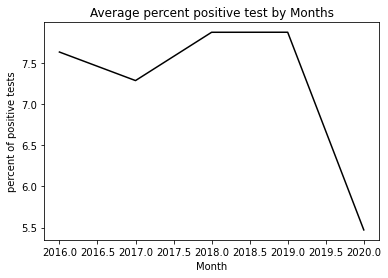

In [19]:
plt.plot(region_avg_positive, 'black')
plt.title("Average percent positive test by Months")
plt.xlabel("Month")
plt.ylabel("percent of positive tests")

Text(0, 0.5, 'percent of positive tests')

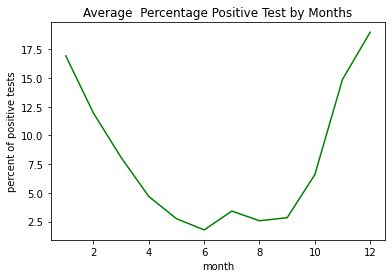

In [20]:
region_avg_positive = year_2019_rsv_data_df.groupby('Month')['% positive tests'].mean()
plt.plot(region_avg_positive, 'green')
plt.title("Average  Percentage Positive Test by Months")
plt.xlabel("month")
plt.ylabel("percent of positive tests")



In [21]:
region_avg_positive = year_2018_rsv_data_df.groupby('Month')['% positive tests'].mean()

Text(0.5, 1.0, 'Average Percentage Positive Test by Months')

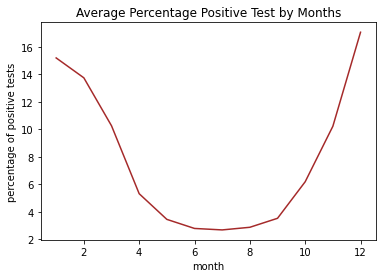

In [22]:
plt.plot(region_avg_positive, "brown")
plt.xlabel("month")
plt.ylabel("percentage of positive tests")
plt.title("Average Percentage Positive Test by Months")

In [23]:
##morgan asked for: all of the values that were plotted 
new_region_avg_positive = RSV_df.groupby('HHS region')['% positive tests'].mean()

Text(0, 0.5, 'Percent Positive RSV Tests')

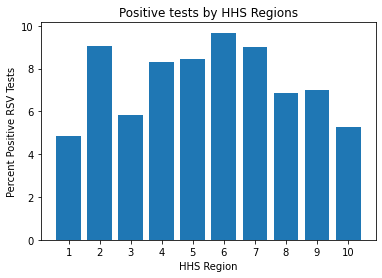

In [34]:
x_axis = [0, 1,2,3,4,5,6,7,8,9]
plt.bar(x_axis,new_region_avg_positive)
plt.xticks(x_axis, labels=['1', '2', '3','4','5','6','7','8','9','10'])
plt.show
plt.title("Positive tests by HHS Regions")
plt.xlabel("HHS Region")
plt.ylabel("Percent Positive RSV Tests")